In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn . model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score, max_error
from sklearn.preprocessing import OneHotEncoder

## Skripta zadatak_1.py ucitava podatkovni skup iz data_C02_emission.csv.
## Potrebno je izgraditi i vrednovati model koji procjenjuje emisiju C02 plinova na temelju ostalih numerickih ulaznih velicina. Detalje oko ovog podatkovnog skupa mogu se pronaci u 3. laboratorijskoj vježbi

 a) Odaberite željene numericke velicine specificiranjem liste s nazivima stupaca. Podijelite podatke na skup za ucenje i skup za testiranje u omjeru 80%-20%.

In [ ]:
data = pd.read_csv('Data/data_C02_emission.csv')

In [ ]:
numerical_features = ['Fuel Consumption City (L/100km)','Fuel Consumption Hwy (L/100km)','Fuel Consumption Comb (L/100km)','Fuel Consumption Comb (mpg)', 'Engine Size (L)', 'Cylinders']
X = data[numerical_features].to_numpy()
y = data['CO2 Emissions (g/km)'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

b) Pomocu matplotlib biblioteke i dijagrama raspršenja prikažite ovisnost emisije C02 plinova o jednoj numerickoj velicini. Pri tome podatke koji pripadaju skupu za ucenje oznacite
plavom bojom, a podatke koji pripadaju skupu za testiranje oznacite crvenom bojom.

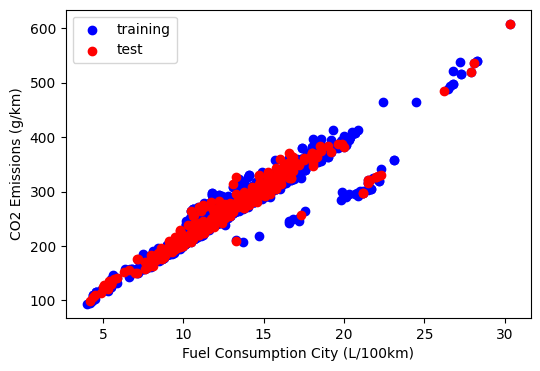

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(X_train[:,0], y_train, color="blue", label="training")
plt.scatter(X_test[:,0],y_test, color="red", label="test")
plt.xlabel('Fuel Consumption City (L/100km)')
plt.ylabel('CO2 Emissions (g/km)')
plt.legend()
plt.show()

c) Izvršite standardizaciju ulaznih velicina skupa za ucenje. Prikažite histogram vrijednosti jedne ulazne velicine prije i nakon skaliranja. Na temelju dobivenih parametara skaliranja transformirajte ulazne velicine skupa podataka za testiranje.

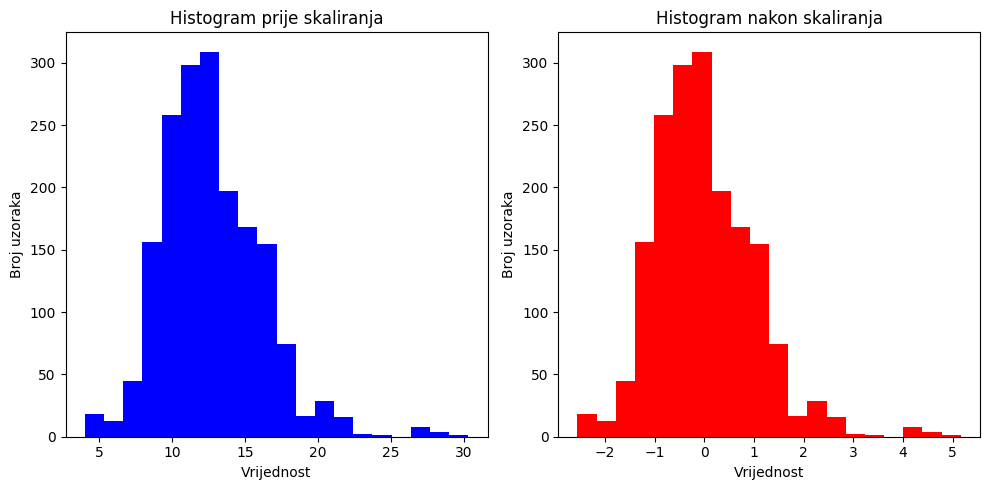

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(X_train[:,0], bins=20, color="blue")
plt.title('Histogram prije skaliranja')
plt.xlabel('Vrijednost')
plt.ylabel('Broj uzoraka')

plt.subplot(1, 2, 2)
plt.hist(X_train_scaled[:,0], bins=20, color="red")
plt.title('Histogram nakon skaliranja')
plt.xlabel('Vrijednost')
plt.ylabel('Broj uzoraka')

plt.tight_layout()
plt.show()
X_test_scaled = scaler.transform(X_test)


d) Izgradite linearni regresijski modeli. Ispišite u terminal dobivene parametre modela i
povežite ih s izrazom 4.6

In [ ]:
linear_regression = lm.LinearRegression()
linear_regression.fit(X_train_scaled, y_train)
print(linear_regression.coef_)

[ -7.83529938  -0.48265607  45.20221679 -14.42360669   1.1945077
  10.4901448 ]


e) Izvršite procjenu izlazne velicine na temelju ulaznih velicina skupa za testiranje. Prikažite pomocu dijagrama raspršenja odnos izmedu stvarnih vrijednosti izlazne velicine i procjene dobivene modelom.

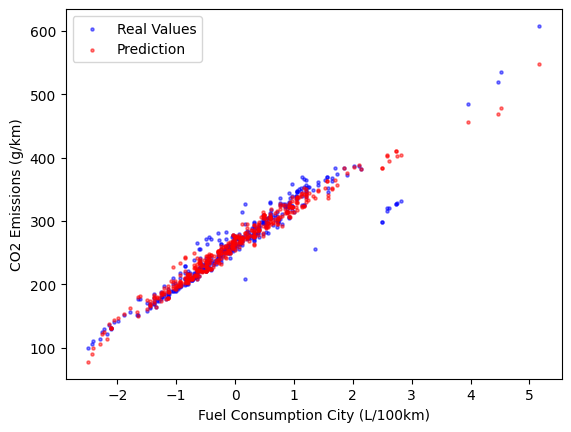

In [ ]:
y_prediction = linear_regression.predict(X_test_scaled)
fuel_consumption = X_test_scaled[:, 0]
plt.scatter(fuel_consumption, y_test, c='b', label='Real Values', s=5, alpha=0.5)
plt.scatter(fuel_consumption, y_prediction, c='r', label='Prediction', s=5, alpha=0.5)
plt.xlabel('Fuel Consumption City (L/100km)')
plt.ylabel('CO2 Emissions (g/km)')
plt.legend()
plt.show()




f) Izvršite vrednovanje modela na nacin da izracunate vrijednosti regresijskih metrika na skupu podataka za testiranje.

In [ ]:
print('MSE - Mean squared error: {:.5f}'.format(mean_squared_error(y_test, y_prediction)))
print('MSE - Mean squared error: {:.5f}'.format(np.sqrt(mean_squared_error(y_test, y_prediction))))
print('MAE - Mean absolute error: {:.5f}'.format(mean_absolute_error(y_test, y_prediction)))
print('MAPE - Mean absolute percentage error: {:.5f}'.format(mean_absolute_percentage_error(y_test, y_prediction))+'%')
print('R^2: {:.5f}'.format(r2_score(y_test, y_prediction)))


MSE - Mean squared error: 257.20023
MSE - Mean squared error: 16.03746
MAE - Mean absolute error: 8.18450
MAPE - Mean absolute percentage error: 0.02989%
R^2: 0.93641


## Na temelju rješenja prethodnog zadatka izradite model koji koristi i kategoricku varijable „Fuel Type“ kao ulaznu velicinu. Pri tome koristite 1-od-K kodiranje kategorickih velicina. Radi jednostavnosti nemojte skalirati ulazne velicine. Komentirajte dobivene rezultate. Kolika je maksimalna pogreška u procjeni emisije C02 plinova u g/km? O kojem se modelu vozila radi?

In [ ]:
data = pd.read_csv('Data/data_C02_emission.csv')

In [ ]:
encoder = OneHotEncoder()
X_encoded = pd.DataFrame(encoder.fit_transform(data[['Fuel Type']]).toarray())
data = data.join(X_encoded)

data.columns = ['Make','Model','Vehicle Class','Engine Size (L)','Cylinders','Transmission','Fuel Type','Fuel Consumption City (L/100km)','Fuel Consumption Hwy (L/100km)','Fuel Consumption Comb (L/100km)','Fuel Consumption Comb (mpg)','CO2 Emissions (g/km)','Fuel0', 'Fuel1', 'Fuel2', 'Fuel3']
y = data['CO2 Emissions (g/km)'].copy()
X = data.drop('CO2 Emissions (g/km)', axis=1)
X_train_all , X_test_all , y_train , y_test = train_test_split (X, y, test_size = 0.2, random_state =1)

X_train = X_train_all[['Engine Size (L)','Cylinders','Fuel Consumption City (L/100km)','Fuel Consumption Hwy (L/100km)','Fuel Consumption Comb (L/100km)','Fuel Consumption Comb (mpg)','Fuel0', 'Fuel1', 'Fuel2', 'Fuel3']]
X_test = X_test_all[['Engine Size (L)','Cylinders','Fuel Consumption City (L/100km)','Fuel Consumption Hwy (L/100km)','Fuel Consumption Comb (L/100km)','Fuel Consumption Comb (mpg)','Fuel0', 'Fuel1', 'Fuel2', 'Fuel3']]

data.head(5)

Make              Model Vehicle Class  Engine Size (L)  Cylinders  \
0  Acura                ILX       Compact              2.4          4   
1  Acura         MDX SH-AWD    SUV: Small              3.5          6   
2  Acura  MDX SH-AWD A-SPEC    SUV: Small              3.5          6   
3  Acura     MDX Hybrid AWD    SUV: Small              3.0          6   
4  Acura                NSX    Two-seater              3.5          6   

  Transmission Fuel Type  Fuel Consumption City (L/100km)  \
0          AM8         Z                              9.9   
1          AS9         Z                             12.3   
2          AS9         Z                             12.2   
3          AM7         Z                              9.1   
4          AM9         Z                             11.1   

   Fuel Consumption Hwy (L/100km)  Fuel Consumption Comb (L/100km)  \
0                             7.0                              8.6   
1                             9.2                             10.9   
2                             9.5                             11.0   
3                             9.0                              9.0   
4                            10.8                             11.0   

   Fuel Consumption Comb (mpg)  CO2 Emissions (g/km)  Fuel0  Fuel1  Fuel2  \
0                           33                   199    0.0    0.0    0.0   
1                           26                   254    0.0    0.0    0.0   
2                           26                   258    0.0    0.0    0.0   
3                           31                   210    0.0    0.0    0.0   
4                           26                   261    0.0    0.0    0.0   

   Fuel3  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0

In [ ]:
linear_regression = lm.LinearRegression()
linear_regression.fit(X_train,y_train)
y_prediction = linear_regression.predict(X_test)

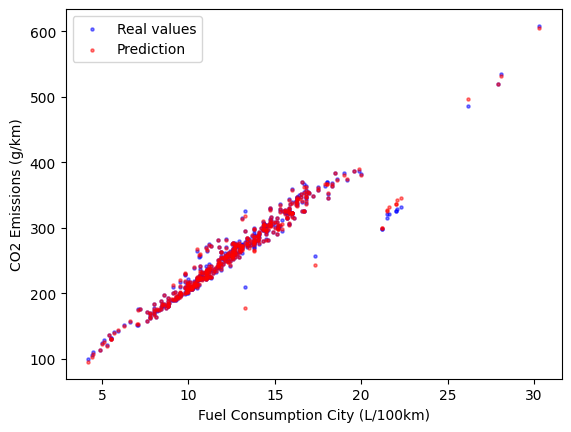

In [ ]:
plt.scatter(X_test['Fuel Consumption City (L/100km)'],y_test, c='b',label='Real values', s=5, alpha=0.5)
plt.scatter(X_test['Fuel Consumption City (L/100km)'],y_prediction, c='r',label='Prediction', s=5, alpha=0.5)
plt.xlabel('Fuel Consumption City (L/100km)')
plt.ylabel('CO2 Emissions (g/km)')
plt.legend()
plt.show()


In [ ]:
maxerror = max_error(y_test, y_prediction)
print('Max pogreška u procjeni: {:.3f}'.format(maxerror))
print(f"Model vozila s max pogreškom u procjeni: {X_test_all[abs(y_test-y_prediction) == maxerror]['Model'].iloc[0]}")

Max pogreška u procjeni: 31.157
Model vozila s max pogreškom u procjeni: Transit Connect Van FFV
